<a href="https://colab.research.google.com/github/ganeshdasrla/odin_python/blob/main/ML_Class_on_June_9th_2024ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [5]:
kmeans_df = pd.read_csv('kmeans.csv')

In [6]:
kmeans_df.head()

,Unnamed: 0,height,weight
0,0,177.640523,47.235051
1,1,164.001572,63.268093
2,2,169.787380,64.322181
3,3,182.408932,56.289175
4,4,178.675580,71.348773


<Axes: xlabel='height', ylabel='weight'>

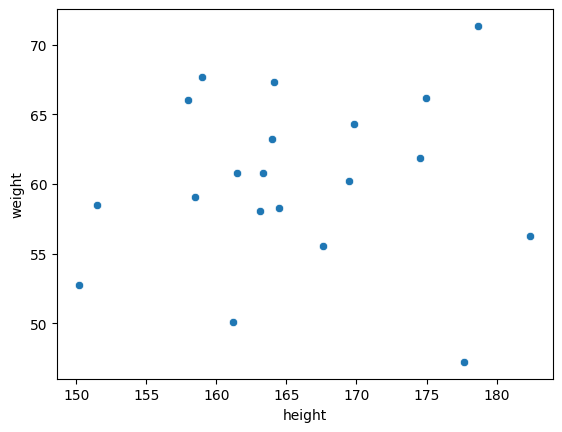

In [11]:
# write knn
import seaborn as sns
sns.scatterplot(data=kmeans_df, x='height', y='weight')

In [21]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5)
kmeans.fit(kmeans_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [22]:
pred = kmeans.predict(kmeans_df)

In [23]:
kmeans_df['cluster'] = pd.DataFrame(pred,columns=['cluster'])

In [24]:
kmeans_df.head()

,Unnamed: 0,height,weight,cluster
0,0,177.640523,47.235051,3
1,1,164.001572,63.268093,1
2,2,169.787380,64.322181,4
3,3,182.408932,56.289175,3
4,4,178.675580,71.348773,4


<Axes: xlabel='height', ylabel='weight'>

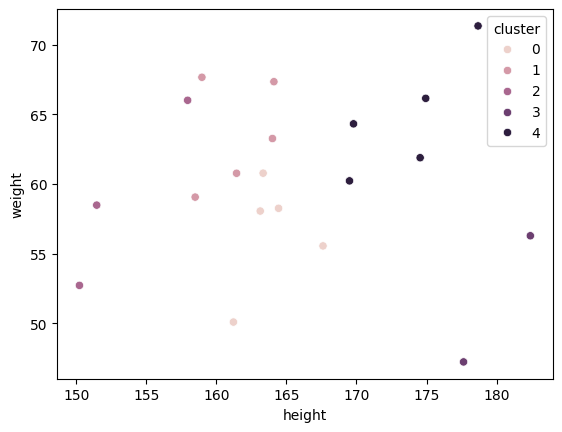

In [25]:
sns.scatterplot(data=kmeans_df, x='height', y='weight', hue='cluster')

## K-nearest neighbour and support vector machines

In [27]:
diamonds_df = pd.read_csv('Diamonds Prices2022.csv')

In [30]:
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [31]:
diamonds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [32]:
diamonds_df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,26972.000000,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,15572.147122,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13486.500000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26972.000000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.500000,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,53943.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [33]:
diamonds_df.shape

(53943, 11)

In [34]:
diamonds_df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [36]:
# drop Unnamed: 0 column
diamonds_df.drop('Unnamed: 0', axis=1, inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [37]:
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [39]:
# seperate independent and dependant variables which is price
X = diamonds_df.drop('price', axis=1)
y = diamonds_df['price'] # target variable

In [43]:
# encoding catagorical variable
cat_variable=X.select_dtypes(include='object')

In [44]:
cat_variable

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53938,Premium,H,SI2
53939,Ideal,D,SI2
53940,Premium,E,SI1
53941,Premium,F,SI1


In [45]:
# get unique values from cat_variable
for col in cat_variable.columns:
    print(f'{col} : {X[col].value_counts()}')

cut : cut
Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: count, dtype: int64
color : color
G    11292
E     9799
F     9543
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64
clarity : clarity
SI1     13067
VS2     12259
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64


In [46]:
cut_map = {'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}
color_map = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}
clarity_map = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

In [47]:
X['cut'] = X['cut'].map(cut_map)
X['color'] = X['color'].map(color_map)
X['clarity'] = X['clarity'].map(clarity_map)

In [48]:
# split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Train the data
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [51]:
# testing
y_pred = knn.predict(X_test)

In [52]:
# evaluate using metrics related regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [56]:
mae

477.18948311551884

In [53]:
# get root mean sqaured error
rmse = np.sqrt(mse)

In [54]:
rmse

906.8543965322215

In [55]:
r2

0.9473273850982886

In [57]:
# calculate the adjusted r2_score
adj_r2 = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)

In [58]:
adj_r2

0.9473185954234307

In [59]:
# please apply support vector regressor
from sklearn.svm import SVR
svr = SVR()

In [60]:
svr.fit(X_train, y_train)

SVR()

In [61]:
# test the model
y_pred = svr.predict(X_test)

In [62]:
y_pred

array([2306.24580849, 2434.51222597, 2453.54985806, ..., 2389.7093912 ,
       2487.25035067, 2323.92532094])

In [63]:
np.array(y_test)

array([ 559, 8403, 1238, ..., 1438, 3742,  786])

In [64]:
# evaluate
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [65]:
np.sqrt(mse)

4171.486841890324